Intensity vs Fermi Chopper frequency

Just try the original parameters

In [1]:
cd ~/dv/sns-chops/resolution/CNCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [3]:
from mcni.utils import conversion as C

In [4]:
%matplotlib notebook

# Exp data

In [5]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [7]:
ls ..

generate-resolution-data-from-V-experiments-HighFlux.ipynb
generate-resolution-data-from-V-experiments-HighRes.ipynb
generate-resolution-data-from-V-experiments-Intermediate.ipynb
mcvine/
mcvine moderator and Fermi chopper.ipynb
mcvine white beam.ipynb
mcvine white beam-SNS_source_r1.ipynb
PyChop/
Untitled.ipynb
V-analysis/
V_Cali_Int_Res_HighFlux.dat
V_Cali_Int_Res_HighFlux_datatable.pkl
V_Cali_Int_Res_HighRes.dat
V_Cali_Int_Res_HighRes_datatable.pkl
V_Cali_Int_Res_Intermediate.dat
V_Cali_Int_Res_Intermediate_datatable.pkl


In [32]:
ls ../

generate-resolution-data-from-V-experiments-HighFlux.ipynb
generate-resolution-data-from-V-experiments-HighRes.ipynb
generate-resolution-data-from-V-experiments-Intermediate.ipynb
mcvine/
mcvine-Ei_1.ipynb
mcvine moderator and Fermi chopper.ipynb
mcvine white beam.ipynb
mcvine white beam-SNS_source_r1.ipynb
PyChop/
Untitled.ipynb
V-analysis/
V_Cali_Int_Res_HighFlux.dat
V_Cali_Int_Res_HighFlux_datatable.pkl
V_Cali_Int_Res_HighRes.dat
V_Cali_Int_Res_HighRes_datatable_E1000bins.pkl
V_Cali_Int_Res_HighRes_datatable.pkl
V_Cali_Int_Res_HighRes_E1000bins.dat
V_Cali_Int_Res_Intermediate.dat
V_Cali_Int_Res_Intermediate_datatable.pkl


In [44]:
expdata_highres = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighRes.dat'))
expdata_interm = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_Intermediate.dat'))
expdata_highflux = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighFlux.dat'))

reading data. please wait...
  done
reading data. please wait...
  done
reading data. please wait...
  done


<IPython.core.display.Javascript object>


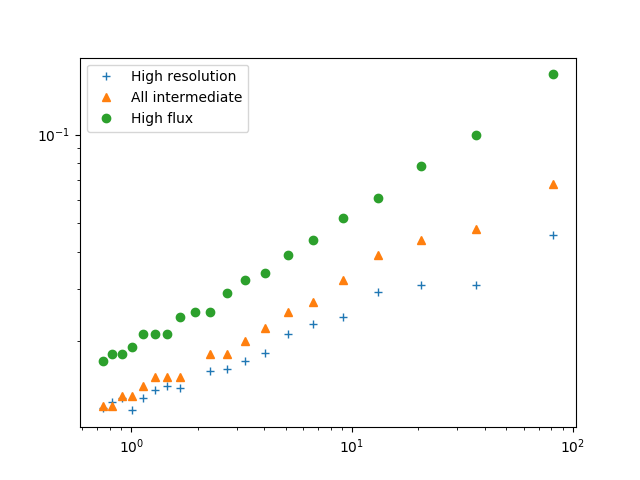

In [45]:
plt.figure()
plt.loglog(expdata_highres.Ei_list, expdata_highres.FWHM/np.array(expdata_highres.Ei_list), 
             '+', label='High resolution')
plt.loglog( expdata_interm.Ei_list, expdata_interm.FWHM/np.array(expdata_interm.Ei_list),
             '^', label='All intermediate')
plt.loglog(expdata_highflux.Ei_list, expdata_highflux.FWHM/np.array(expdata_highflux.Ei_list),
             'o', label='High flux')
plt.legend()

In [8]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

<IPython.core.display.Javascript object>


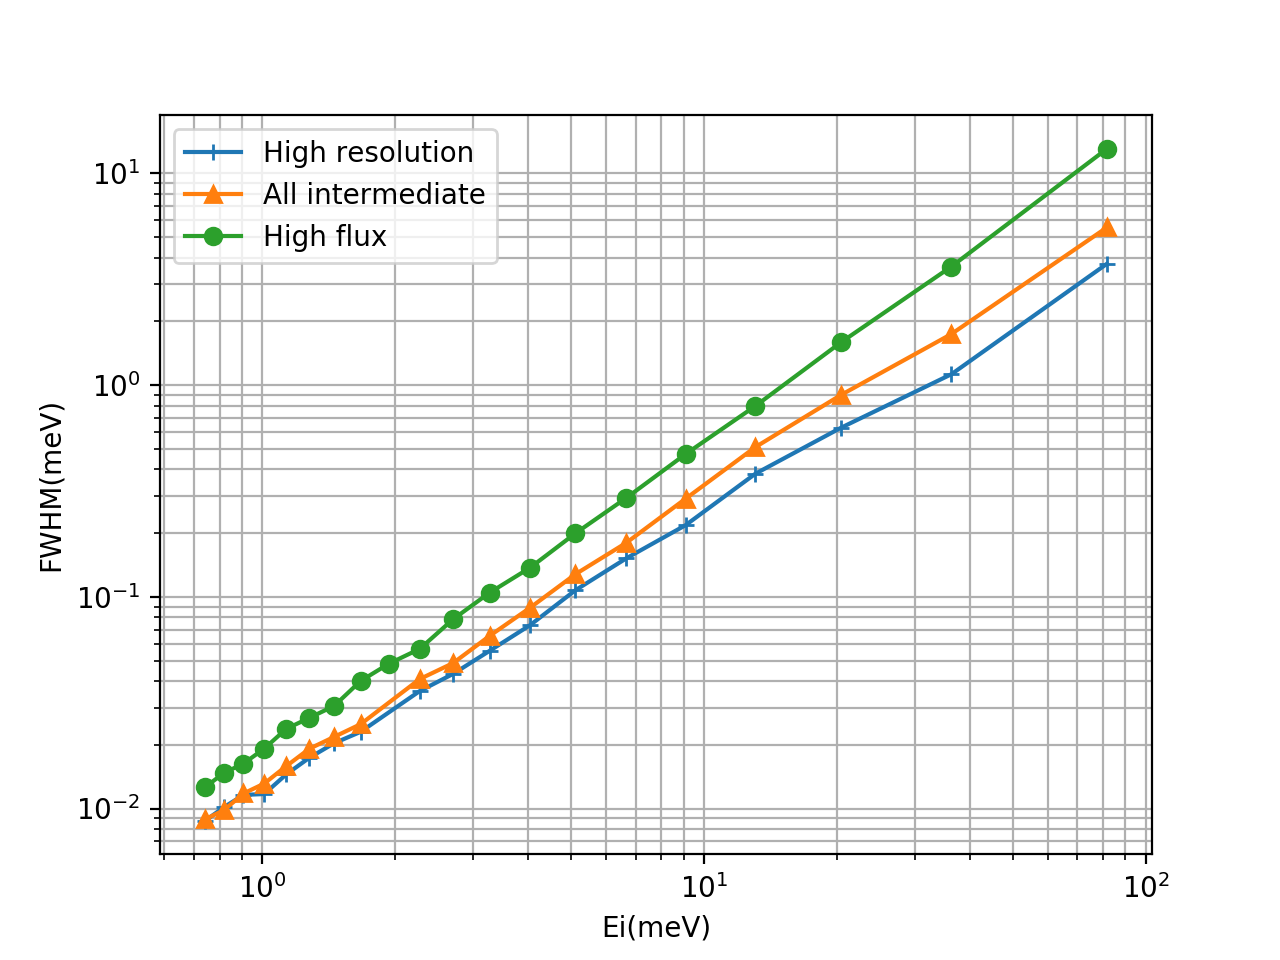

In [9]:
plt.figure()
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
plt.loglog(x,y, '+-', label='High resolution')
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
plt.loglog(x,y, '^-', label='All intermediate')
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.yticks
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

# Load Daniel's data

In [41]:
import sys
sys.path.insert(0, '/SNS/CNCS/shared/UsefulMantidScripts_2018')

In [42]:
import cncs

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
plt.loglog(x,y, '+-', label='High resolution')
plt.loglog(cncs.Ei_list_0, cncs.fwhm_list_0, '+-', label='High resolution - Daniel')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

plt.subplot(1,3,2)
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
plt.loglog(x,y, '^-', label='All intermediate')
plt.loglog(cncs.Ei_list_3, cncs.fwhm_list_3, '^-', label='Intermediate - Daniel')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

plt.subplot(1,3,3)
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.loglog(cncs.Ei_list_1, cncs.fwhm_list_1, 'o-', label='High flux - Daniel')

plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

<IPython.core.display.Javascript object>


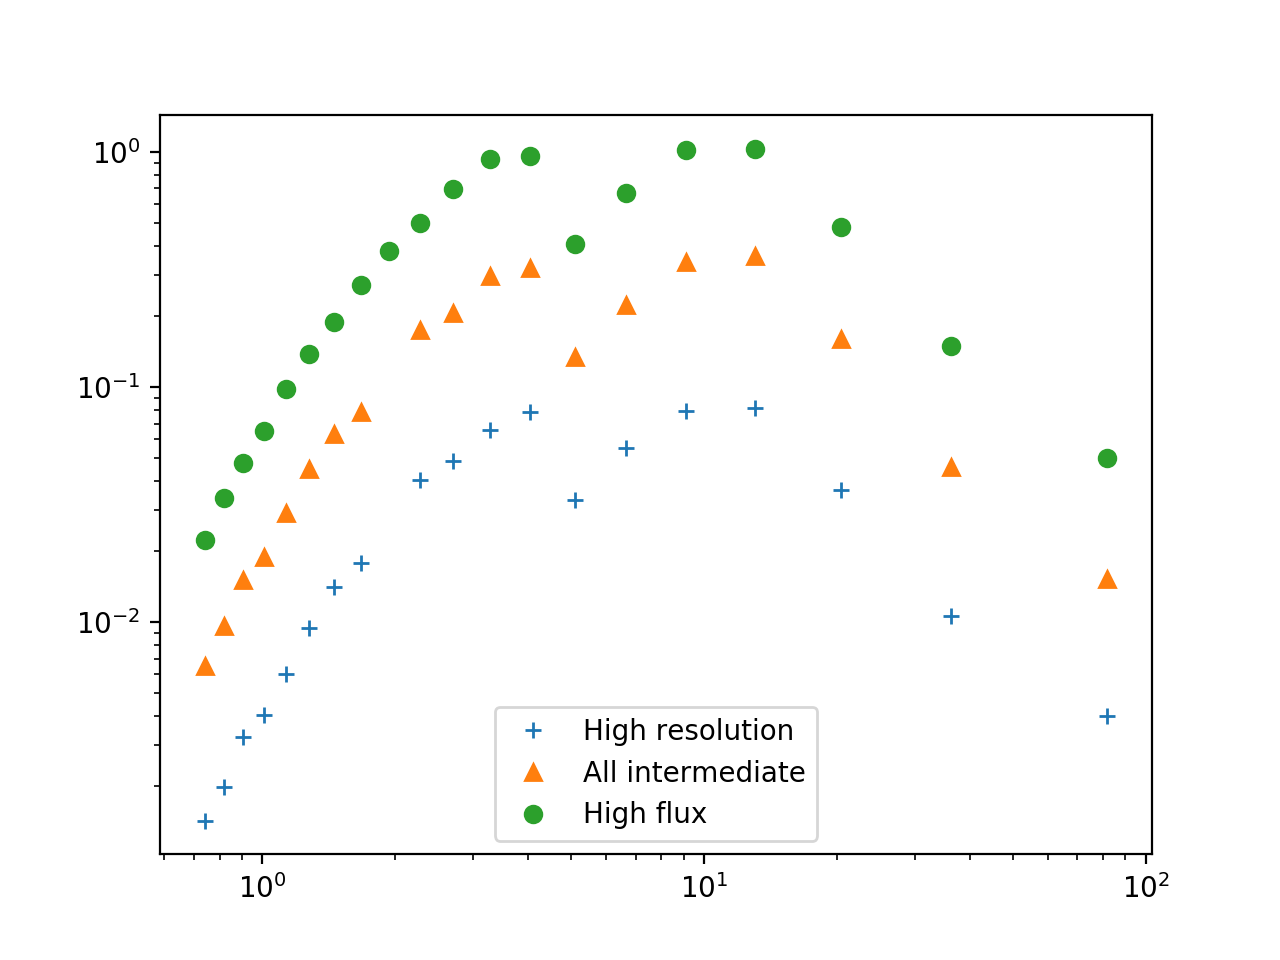

In [23]:
plt.figure()
plt.loglog(expdata_highres.Ei_list, expdata_highres.intensity, 
             '+', label='High resolution')
plt.loglog( expdata_interm.Ei_list, expdata_interm.intensity,
             '^', label='All intermediate')
plt.loglog(expdata_highflux.Ei_list, expdata_highflux.intensity,
             'o', label='High flux')
plt.legend()

# PyChop

In [10]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [11]:
from PyChop import PyChop2

In [29]:
from PyChop import Chop
reload(Chop)

<module 'PyChop.Chop' from '/SNS/users/lj7/dv/PyChop/Chop.py'>

In [12]:
import PyChop

In [49]:
instrument = PyChop2('cncs.yaml')
# instrument = PyChop2('cncs-v4.yaml')

In [50]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

<IPython.core.display.Javascript object>


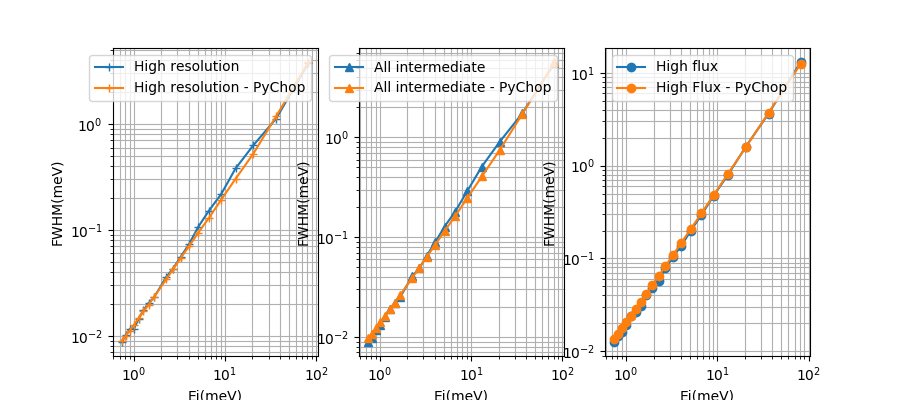

In [51]:
def decorate(ax):
    ax.grid(True, which='minor')
    ax.grid(True, which='major')
    ax.set_xlabel('Ei(meV)')
    ax.set_ylabel('FWHM(meV)')
    ax.legend()
    return

fig, ax = plt.subplots(1, 3, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
ax[0].loglog(x,y, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
ax[0].loglog(x,y_pychop, '+-', label='High resolution - PyChop')
decorate(ax[0])

x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax[1].loglog(x,y, '^-', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=240.)[0][0] for _ in x]
ax[1].loglog(x,y_pychop, '^-', label='All intermediate - PyChop')
decorate(ax[1])

x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax[2].loglog(x,y, 'o-', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax[2].loglog(x,y_pychop, 'o-', label='High Flux - PyChop')
decorate(ax[2])


<IPython.core.display.Javascript object>


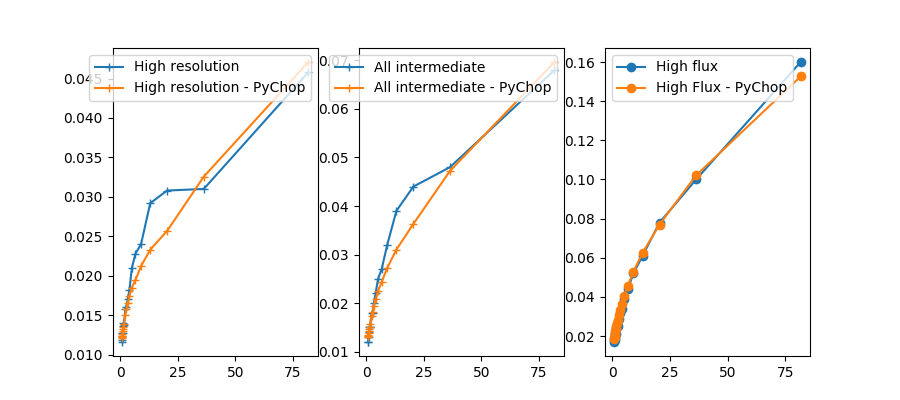

In [52]:
instrument = PyChop2('cncs.yaml')

fig, axes = plt.subplots(1, 3, figsize=(9,4))

ax = axes[0]
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
# ax.loglog(x,y, '+-', label='High resolution')
ax.plot(x, y/x, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
# ax.loglog(x,y_pychop, '+-', label='High resolution - PyChop')
ax.plot(x, y_pychop/x, '+-', label='High resolution - PyChop')
ax.legend()


ax = axes[1]
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax.plot(x, y/x, '+-', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=240.)[0][0] for _ in x]
ax.plot(x, y_pychop/x, '+-', label='All intermediate - PyChop')
ax.legend()

ax = axes[2]
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax.plot(x,y/x, 'o-', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax.plot(x,y_pychop/x, 'o-', label='High Flux - PyChop')
ax.legend()

# Resolution vs E transfer

## 1meV

In [53]:
Es = np.arange(-1, 1, 0.01)

In [59]:
instrument = PyChop2('cncs.yaml')
instrument.setChopper('High Resolution')
highres_res = instrument.getResolution(Etrans=Es, Ei_in=1., frequency=180.)
instrument.setChopper('Intermediate')
interm_res = instrument.getResolution(Etrans=Es, Ei_in=1., frequency=240.)
instrument.setChopper('High Flux')
highflux_res = instrument.getResolution(Etrans=Es, Ei_in=1., frequency=300.)

<IPython.core.display.Javascript object>


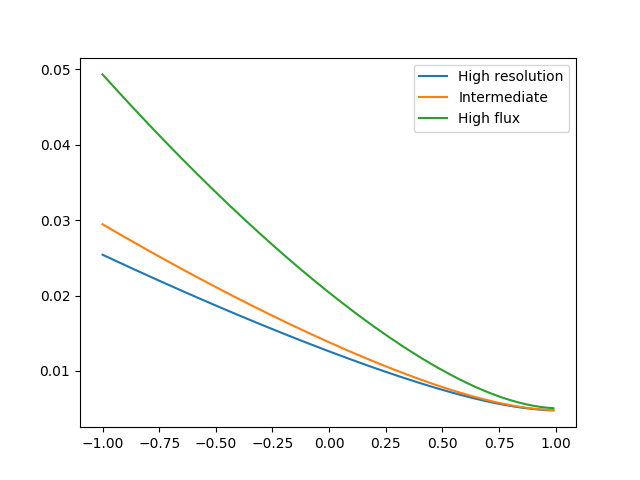

In [61]:
plt.figure()
plt.plot(Es, highres_res, label='High resolution')
plt.plot(Es, interm_res, label='Intermediate')
plt.plot(Es, highflux_res, label='High flux')
plt.legend()

In [66]:
header = '  '.join(['E', 'high_resolution', 'intermediate', 'high_flux'])
np.savetxt('res_vs_E-Ei_1meV.txt', np.array([Es, highres_res, interm_res, highflux_res]).T, header=header)

In [67]:
!head -n 5 ./res_vs_E-Ei_1meV.txt

# E  high_resolution  intermediate  high_flux
-1.000000000000000000e+00 2.542139647123919932e-02 2.946358079330619814e-02 4.934603835543201894e-02
-9.899999999999999911e-01 2.528084290721935995e-02 2.928806132046844410e-02 4.901282334110181743e-02
-9.799999999999999822e-01 2.514051110625939098e-02 2.911288575347598453e-02 4.868040455665038208e-02
-9.699999999999999734e-01 2.500040163399286017e-02 2.893805494252824073e-02 4.834878404222942710e-02


## 12meV

In [70]:
Es = np.arange(-12, 12, 0.1)
Ei = 12.

In [71]:
instrument = PyChop2('cncs.yaml')
instrument.setChopper('High Resolution')
highres_res = instrument.getResolution(Etrans=Es, Ei_in=Ei, frequency=180.)
instrument.setChopper('Intermediate')
interm_res = instrument.getResolution(Etrans=Es, Ei_in=Ei, frequency=240.)
instrument.setChopper('High Flux')
highflux_res = instrument.getResolution(Etrans=Es, Ei_in=Ei, frequency=300.)

<IPython.core.display.Javascript object>


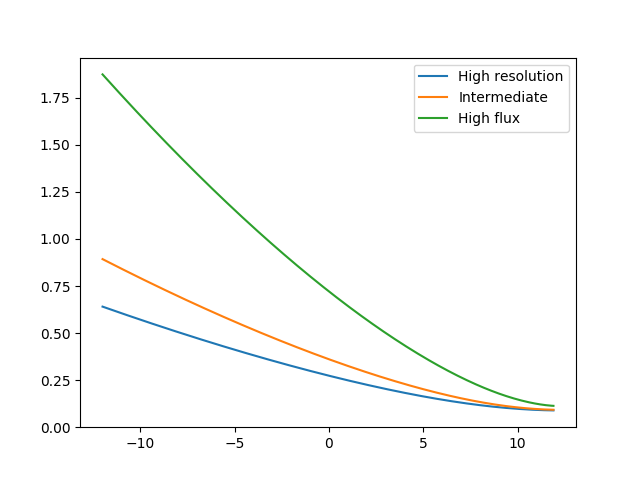

In [72]:
plt.figure()
plt.plot(Es, highres_res, label='High resolution')
plt.plot(Es, interm_res, label='Intermediate')
plt.plot(Es, highflux_res, label='High flux')
plt.legend()

In [73]:
header = '  '.join(['E', 'high_resolution', 'intermediate', 'high_flux'])
np.savetxt('res_vs_E-Ei_12meV.txt', np.array([Es, highres_res, interm_res, highflux_res]).T, header=header)

In [74]:
!head -n 5 ./res_vs_E-Ei_12meV.txt

# E  high_resolution  intermediate  high_flux
-1.200000000000000000e+01 6.410443784737406281e-01 8.930532084867353060e-01 1.872736341189423781e+00
-1.190000000000000036e+01 6.375245328785276167e-01 8.879300448026679060e-01 1.861618950085190738e+00
-1.180000000000000071e+01 6.340116520109816411e-01 8.828173713647803345e-01 1.850524713707998092e+00
-1.170000000000000107e+01 6.305057521249901598e-01 8.777152116723268005e-01 1.839453681510770267e+00
